In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
khouse_train = pd.read_csv('assessment data/wk3_kc_house_train_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
khouse_test = pd.read_csv('assessment data/wk3_kc_house_test_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('assessment data/kc_house_data.csv', dtype=dtype_dict)
sales.sort_values(by=['sqft_living','price'], inplace=True)
poly1_data = sales[['sqft_living','price']]
poly_data = polynomial_dataframe(sales['sqft_living'],3)
poly15_data = polynomial_dataframe(sales['sqft_living'],15)

In [35]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name]=feature**power
    return poly_dataframe


def RSS(y,y_est):
    return ((y-y_est)**2).sum()

In [8]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(poly_data[['power_1']],poly1_data['price'])
model2 = LinearRegression()
model2.fit(poly_data[['power_1','power_2']],sales['price'])
model3 = LinearRegression()
model3.fit(poly_data[['power_1','power_2','power_3']],sales['price'])
model15 = LinearRegression()
model15.fit(poly15_data,sales['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

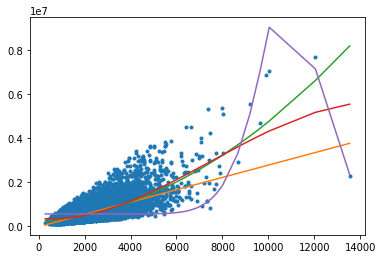

In [64]:
plt.plot(poly1_data['sqft_living'],poly1_data['price'],'.',
poly1_data['sqft_living'], model1.predict(poly_data[['power_1']]),'-',
poly1_data['sqft_living'], model2.predict(poly_data[['power_1','power_2']]),'-',
poly1_data['sqft_living'], model3.predict(poly_data[['power_1','power_2','power_3']]),'-',
poly1_data['sqft_living'], model15.predict(poly15_data),'-')


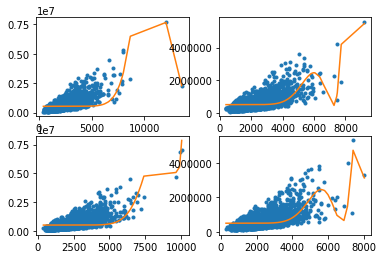

In [14]:
data_1 = pd.read_csv('assessment data/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
data_2 = pd.read_csv('assessment data/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
data_3 = pd.read_csv('assessment data/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
data_4 = pd.read_csv('assessment data/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
p15_d1 = polynomial_dataframe(data_1['sqft_living'],15)
p15_d2 = polynomial_dataframe(data_2['sqft_living'],15)
p15_d3 = polynomial_dataframe(data_3['sqft_living'],15)
p15_d4 = polynomial_dataframe(data_4['sqft_living'],15)
m15_d1 = LinearRegression()
m15_d1.fit(p15_d1,data_1['price'])
m15_d2 = LinearRegression()
m15_d2.fit(p15_d2,data_2['price'])
m15_d3 = LinearRegression()
m15_d3.fit(p15_d3,data_3['price'])
m15_d4 = LinearRegression()
m15_d4.fit(p15_d4,data_4['price'])

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(data_1['sqft_living'],data_1['price'],'.',
          data_1['sqft_living'],m15_d1.predict(p15_d1),'-')
ax[0,1].plot(data_2['sqft_living'],data_2['price'],'.',
          data_2['sqft_living'],m15_d2.predict(p15_d2),'-')
ax[1,0].plot(data_3['sqft_living'],data_3['price'],'.',
          data_3['sqft_living'],m15_d3.predict(p15_d3),'-')
ax[1,1].plot(data_4['sqft_living'],data_4['price'],'.',
          data_4['sqft_living'],m15_d4.predict(p15_d4),'-')

In [88]:
valid_data = pd.read_csv('assessment data/wk3_kc_house_valid_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('assessment data/wk3_kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('assessment data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

models_of_p=[]
for i in range(16):
    poly = polynomial_dataframe(train_data['sqft_living'],i)
    poly_v = polynomial_dataframe(valid_data['sqft_living'],i)
    models_of_p.append(LinearRegression())
    models_of_p[i].fit(poly,train_data['price'])
    print('RSS of poly-',i,' is: ',
         RSS(valid_data['price'],models_of_p[i].predict(poly_v)))

poly = polynomial_dataframe(train_data['sqft_living'],6)
poly_test = polynomial_dataframe(test_data['sqft_living'],6)
m6 = LinearRegression()
m6.fit(poly,train_data['price'])
print('\nRSS of test data with poly6 model is:')
print(RSS(test_data['price'],m6.predict(poly_test)))

RSS of poly- 0  is:  629097886299585.8
RSS of poly- 1  is:  629097886299585.8
RSS of poly- 2  is:  623955062706518.0
RSS of poly- 3  is:  625820280251531.0
RSS of poly- 4  is:  629987341468500.5
RSS of poly- 5  is:  628240679314420.9
RSS of poly- 6  is:  566268593934056.0
RSS of poly- 7  is:  1073845792802398.6
RSS of poly- 8  is:  7087731525068529.0
RSS of poly- 9  is:  4.530345223846528e+16
RSS of poly- 10  is:  2.475686241299034e+17
RSS of poly- 11  is:  1.193801479215099e+18
RSS of poly- 12  is:  5.093260375057912e+18
RSS of poly- 13  is:  7.616230021287881e+17
RSS of poly- 14  is:  2.2975609250063524e+18
RSS of poly- 15  is:  6.955038097243406e+18

RSS of test data with poly6 model is:
135225114656622.97




### Here start practice of Ridge Regression:

In [5]:
from sklearn.linear_model import Ridge
l2_small_penalty = 1.5e-5
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])
model.coef_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

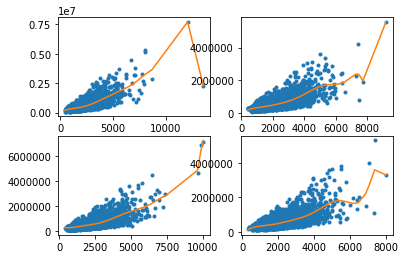

In [20]:
l2_small_penalty=1e-9
p15_d1 = polynomial_dataframe(data_1['sqft_living'],15)
p15_d2 = polynomial_dataframe(data_2['sqft_living'],15)
p15_d3 = polynomial_dataframe(data_3['sqft_living'],15)
p15_d4 = polynomial_dataframe(data_4['sqft_living'],15)
m15_d1 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d1.fit(p15_d1,data_1['price'])
m15_d2 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d2.fit(p15_d2,data_2['price'])
m15_d3 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d3.fit(p15_d3,data_3['price'])
m15_d4 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d4.fit(p15_d4,data_4['price'])

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(data_1['sqft_living'],data_1['price'],'.',
          data_1['sqft_living'],m15_d1.predict(p15_d1),'-')
ax[0,1].plot(data_2['sqft_living'],data_2['price'],'.',
          data_2['sqft_living'],m15_d2.predict(p15_d2),'-')
ax[1,0].plot(data_3['sqft_living'],data_3['price'],'.',
          data_3['sqft_living'],m15_d3.predict(p15_d3),'-')
ax[1,1].plot(data_4['sqft_living'],data_4['price'],'.',
          data_4['sqft_living'],m15_d4.predict(p15_d4),'-')

In [21]:
print(m15_d1.coef_)
print(m15_d2.coef_)
print(m15_d3.coef_)
print(m15_d4.coef_)

[ 5.44669399e+02 -3.55447605e-01  1.22446380e-04 -1.17175307e-08
 -3.90512698e-13 -1.39075911e-17  1.47860283e-20  6.87491630e-25
 -7.57203971e-29 -1.04097276e-32 -3.71844269e-37  3.39989255e-41
  5.56592051e-45  2.53761389e-49 -3.35152915e-53]
[ 8.59362651e+02 -8.18118278e-01  4.28879983e-04 -9.12770660e-08
 -2.69604404e-12  3.73980300e-15 -1.42711882e-19 -6.30794703e-23
 -1.44559628e-27  7.44321353e-31  9.25865883e-35  3.28010483e-41
 -1.29543508e-42 -1.38781255e-46  1.66546444e-50]
[-7.55395963e+02  9.75579541e-01 -4.58946006e-04  7.77958113e-08
  7.15013417e-12 -2.88602002e-15 -2.13677720e-20  3.38085194e-23
  2.19178226e-27 -1.97067793e-31 -4.15993202e-35 -1.80196143e-39
  3.19071198e-43  5.08456859e-47 -3.93304243e-51]
[ 1.11944571e+03 -9.83760212e-01  3.38770897e-04  3.60377209e-08
 -4.37814017e-11  5.77191690e-15  7.66795221e-19 -9.49297664e-23
 -1.96030821e-26 -2.10880282e-32  3.31005065e-34  3.47733891e-38
 -2.43039323e-42 -8.79553219e-46  6.44569659e-50]


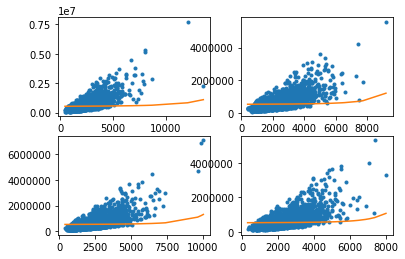

In [22]:
l2_small_penalty=1.23e2
p15_d1 = polynomial_dataframe(data_1['sqft_living'],15)
p15_d2 = polynomial_dataframe(data_2['sqft_living'],15)
p15_d3 = polynomial_dataframe(data_3['sqft_living'],15)
p15_d4 = polynomial_dataframe(data_4['sqft_living'],15)
m15_d1 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d1.fit(p15_d1,data_1['price'])
m15_d2 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d2.fit(p15_d2,data_2['price'])
m15_d3 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d3.fit(p15_d3,data_3['price'])
m15_d4 = Ridge(alpha=l2_small_penalty, normalize=True)
m15_d4.fit(p15_d4,data_4['price'])

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(data_1['sqft_living'],data_1['price'],'.',
          data_1['sqft_living'],m15_d1.predict(p15_d1),'-')
ax[0,1].plot(data_2['sqft_living'],data_2['price'],'.',
          data_2['sqft_living'],m15_d2.predict(p15_d2),'-')
ax[1,0].plot(data_3['sqft_living'],data_3['price'],'.',
          data_3['sqft_living'],m15_d3.predict(p15_d3),'-')
ax[1,1].plot(data_4['sqft_living'],data_4['price'],'.',
          data_4['sqft_living'],m15_d4.predict(p15_d4),'-')

In [24]:
print(m15_d1.coef_[0])
print(m15_d2.coef_[0])
print(m15_d3.coef_[0])
print(m15_d4.coef_[0])

2.328068029579325
2.097569027778555
2.289062581189205
2.085961940919307


In [55]:
train_valid_shuffled = pd.read_csv('assessment data/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('assessment data/wk3_kc_house_test_data.csv', dtype=dtype_dict)
    
def k_fold_cross_validation(k, l2_penalty, data, output):
    sum_of_RSS = 0
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        train_set = data[0:start].append(data[end+1:n])
        valid_set = data[start:end+1]
        y_train = output[0:start].append(output[end+1:n])
        y_valid = output[start:end+1]
        m15 = Ridge(alpha=l2_penalty, normalize=True)
        m15.fit(train_set, y_train)
        sum_of_RSS += RSS(y_valid, m15.predict(valid_set))
    return sum_of_RSS/k

n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
data = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)
# [10^3, 10^3.5, 10^4, ..., 10^9]
for penalty_test in np.logspace(3,9,num=13):
    print(np.log10(penalty_test), k_fold_cross_validation(k,penalty_test,data,train_valid_shuffled['price']))

3.0 264977361036975.94
3.5 265692935858318.25
4.0 265924368957215.66
4.5 265998081509342.66
5.0 266021444553980.5
5.5 266028837918724.5
6.0 266031176438467.9
6.5 266031915996607.4
7.0 266032149870752.5
7.5 266032223828783.66
8.0 266032247216419.84
8.5 266032254612245.16
9.0 266032256951011.06


In [57]:
test_x = polynomial_dataframe(test['sqft_living'],15)
test_y = test['price']
model_test = Ridge(alpha=10^3, normalize=True)
model_test.fit(test_x,test_y)
r=RSS(test_y, model_test.predict(test_x))
"{:e}".format(r)

'2.111632e+14'

## Here starts LASSO regression:

In [77]:
from math import log, sqrt
sales = pd.read_csv('assessment data/kc_house_data.csv', dtype=dtype_dict)
sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']
sales['floors']=sales['floors'].astype('float64')
sales['floors_square'] = sales['floors']*sales['floors']

In [93]:
from sklearn.linear_model import Lasso  # using scikit-learn

all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_lot_sqrt',
            'floors', 'floors_square',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built', 'yr_renovated']

model_all = Lasso(alpha=5e2, normalize=True) # set parameters
model_all.fit(sales[all_features], sales['price']) # learn weights
model_all.coef_

array([    0.        ,     0.        ,     0.        ,   134.43931396,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        , 24750.00458561,     0.        ,
       61749.10309071,     0.        ,     0.        ,    -0.        ,
           0.        ])

In [97]:
[all_features[i] for i in range(len(model_all.coef_)) if model_all.coef_[i] ]

['sqft_living', 'view', 'grade']

In [92]:
validation = pd.read_csv('assessment data/wk3_kc_house_valid_data.csv', dtype=dtype_dict)
training = pd.read_csv('assessment data/wk3_kc_house_train_data.csv', dtype=dtype_dict)
testing = pd.read_csv('assessment data/wk3_kc_house_test_data.csv', dtype=dtype_dict)
testing['floors']=testing['floors'].astype('float64')
training['floors']=training['floors'].astype('float64')
validation['floors']=validation['floors'].astype('float64')

testing['sqft_living_sqrt'] = testing['sqft_living'].apply(sqrt)
testing['sqft_lot_sqrt'] = testing['sqft_lot'].apply(sqrt)
testing['bedrooms_square'] = testing['bedrooms']*testing['bedrooms']
testing['floors_square'] = testing['floors']*testing['floors']

training['sqft_living_sqrt'] = training['sqft_living'].apply(sqrt)
training['sqft_lot_sqrt'] = training['sqft_lot'].apply(sqrt)
training['bedrooms_square'] = training['bedrooms']*training['bedrooms']
training['floors_square'] = training['floors']*training['floors']

validation['sqft_living_sqrt'] = validation['sqft_living'].apply(sqrt)
validation['sqft_lot_sqrt'] = validation['sqft_lot'].apply(sqrt)
validation['bedrooms_square'] = validation['bedrooms']*validation['bedrooms']
validation['floors_square'] = validation['floors']*validation['floors']

In [96]:
for penalty in np.logspace(1,7,num=13):
    model = Lasso(alpha=penalty, normalize=True)
    model.fit(training[all_features], training['price'])
    r = RSS(validation['price'], model.predict(validation[all_features]))
    print(np.log10(penalty),r)

1.0 398213327300134.94
1.5 399041900253346.8
2.0 429791604072559.6
2.5 463739831045121.06
3.0 645898733633800.8
3.5 1222506859427163.0
4.0 1222506859427163.0
4.5 1222506859427163.0
5.0 1222506859427163.0
5.5 1222506859427163.0
6.0 1222506859427163.0
6.5 1222506859427163.0
7.0 1222506859427163.0


In [98]:
model = Lasso(alpha=10, normalize=True)
model.fit(training[all_features], training['price'])
RSS(testing['price'], model.predict(testing[all_features]))

98467402552698.81

In [99]:
np.count_nonzero(model.coef_) + np.count_nonzero(model.intercept_)

15

In [104]:
max_nonzeros = 7
for penalty in np.logspace(1,4,num=20):
    model = Lasso(alpha=penalty, normalize=True)
    model.fit(training[all_features], training['price'])
#     r = RSS(validation['price'], model.predict(validation[all_features]))
    non0 = np.count_nonzero(model.coef_) + np.count_nonzero(model.intercept_)
    print(penalty,non0)

10.0 15
14.38449888287663 15
20.6913808111479 15
29.76351441631318 15
42.81332398719393 13
61.58482110660264 12
88.58667904100822 11
127.42749857031335 10
183.29807108324357 7
263.6650898730358 6
379.26901907322497 6
545.5594781168514 6
784.7599703514607 5
1128.8378916846884 3
1623.776739188721 3
2335.7214690901214 2
3359.818286283781 1
4832.930238571752 1
6951.927961775606 1
10000.0 1


In [108]:
l1_penalty_min = 127.42749857031335
l1_penalty_max = 263.6650898730358

for penalty in np.linspace(l1_penalty_min, l1_penalty_max, 20):
    model = Lasso(alpha=penalty, normalize=True)
    model.fit(training[all_features], training['price'])
    r = RSS(validation['price'], model.predict(validation[all_features]))
    non0 = np.count_nonzero(model.coef_)+np.count_nonzero(model.intercept_)
    if 150<penalty<160:
        print([all_features[i] for i in range(len(model.coef_)) if model.coef_[i] ])
    print(penalty,non0,r)

127.42749857031335 10 435374677102680.6
134.5978981125619 10 437009229124471.3
141.76829765481045 8 438236128386912.25
148.938697197059 8 439158937799660.0
['bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built']
156.10909673930755 7 440037365263316.56
163.2794962815561 7 440777489641605.25
170.44989582380464 7 441566698090139.9
177.6202953660532 7 442406413188666.25
184.79069490830176 7 443296716874315.06
191.96109445055032 7 444239780526141.6
199.13149399279888 7 445230739842614.25
206.3018935350474 6 446268896864706.3
213.47229307729594 6 447112919434640.6
220.6426926195445 6 447998187851564.9
227.81309216179307 6 448924706673255.06
234.98349170404163 6 449892475899711.0
242.1538912462902 6 450901498778123.1
249.32429078853872 6 451952426654987.0
256.49469033078725 6 453043924367599.25
263.6650898730358 6 454176669662635.25
